In [3]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

class GameOfLife:
    def __init__(self, rows, cols, initial_state=None):
        self.rows = rows
        self.cols = cols
        if initial_state is not None:
            self.grid = initial_state
        else:
            self.grid = np.random.choice([0, 1], size=(rows, cols))

    def step(self):
        new_grid = np.zeros((self.rows, self.cols), dtype=int)
        for i in range(self.rows):
            for j in range(self.cols):
                neighbors = self.count_neighbors(i, j)
                if self.grid[i, j] == 1:
                    if neighbors in [2, 3]:
                        new_grid[i, j] = 1
                else:
                    if neighbors == 3:
                        new_grid[i, j] = 1
        self.grid = new_grid

    def count_neighbors(self, i, j):
        total = 0
        for x in [-1, 0, 1]:
            for y in [-1, 0, 1]:
                if x == 0 and y == 0:
                    continue
                ni, nj = i + x, j + y
                if 0 <= ni < self.rows and 0 <= nj < self.cols:
                    total += self.grid[ni, nj]
        return total

    def run(self, steps):
        for _ in range(steps):
            self.step()

    def get_state(self):
        return self.grid


In [4]:

def animate_game(game, steps=100, interval=200):
    fig, ax = plt.subplots(figsize=(game.cols / 10, game.rows / 10))
    img = ax.imshow(game.get_state(), cmap='binary')
    ax.axis("off")
    ax.set_title(f"{game.rows}x{game.cols} - Conway's Game of Life")

    def update(frame):
        game.step()
        img.set_data(game.get_state())
        return [img]

    ani = FuncAnimation(fig, update, frames=steps, interval=interval, blit=True)
    return HTML(ani.to_jshtml())


In [5]:

while True:
    try:
        size = int(input("Ingrese el tamaño de la grilla (ej. 64 para 64x64): "))
        if size <= 0:
            print("Por favor ingrese un número positivo.")
            continue
        break
    except ValueError:
        print("Entrada inválida. Intente con un número entero.")

game = GameOfLife(size, size)
animate_game(game, steps=100, interval=100)


Animation size has reached 21792595 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001E4AFCE87D0>>
Traceback (most recent call last):
  File "C:\Users\ignac\OneDrive - LEAD University\ParalelaDistribuida\PrimerTarea\.venv\Lib\site-packages\ipykernel\ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

,Tamaño de grilla,Celdas (n²),Tiempo promedio (s)
0,32,1024,0.003199
1,64,4096,0.013038
2,128,16384,0.050483
3,256,65536,0.209610
4,512,262144,1.090149
5,1024,1048576,4.083562
6,2048,4194304,15.873341


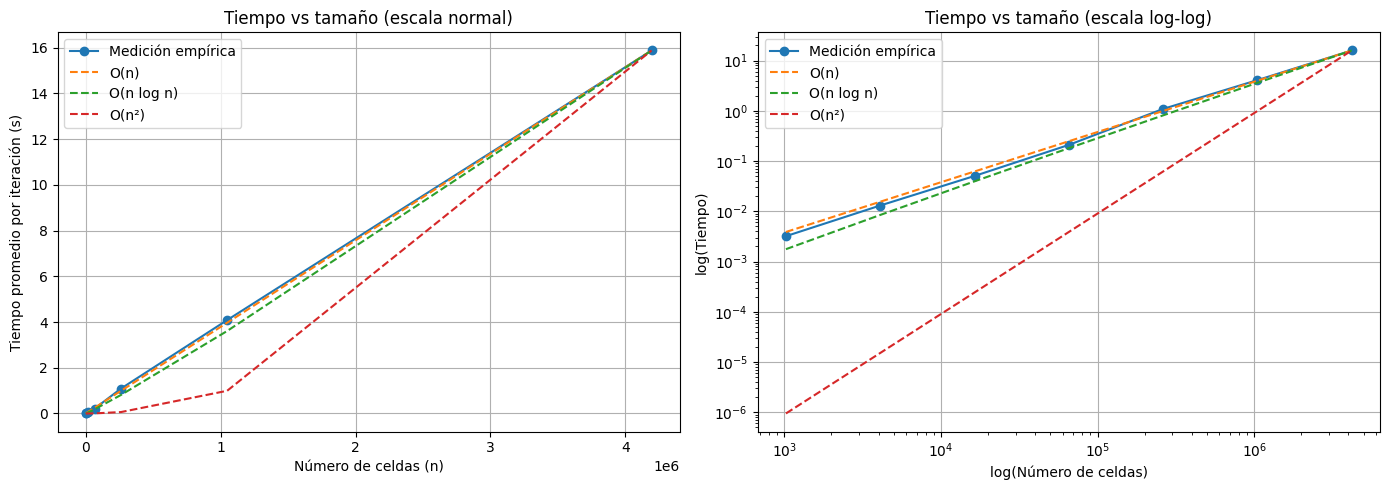

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Para consistencia en las grillas generadas aleatoriamente durante las pruebas
np.random.seed(0)

class GameOfLife:
    def __init__(self, rows, cols):
        self.rows = rows
        self.cols = cols
        self.grid = np.random.choice([0, 1], size=(rows, cols))

    def step(self):
        new_grid = np.zeros((self.rows, self.cols), dtype=int)
        for i in range(self.rows):
            for j in range(self.cols):
                neighbors = self.count_neighbors(i, j)
                if self.grid[i, j] == 1 and neighbors in [2, 3]:
                    new_grid[i, j] = 1
                elif self.grid[i, j] == 0 and neighbors == 3:
                    new_grid[i, j] = 1
        self.grid = new_grid

    def count_neighbors(self, i, j):
        total = 0
        for x in [-1, 0, 1]:
            for y in [-1, 0, 1]:
                if x == 0 and y == 0:
                    continue
                ni, nj = i + x, j + y
                if 0 <= ni < self.rows and 0 <= nj < self.cols:
                    total += self.grid[ni, nj]
        return total

# Tamaños de grilla a evaluar
sizes = [32, 64, 128, 256, 512]
iterations = 10  # Iteraciones por tamaño, más rápido

timings = []

# Medición de tiempo total para cada tamaño
for size in sizes:
    game = GameOfLife(size, size)
    start = time.time()
    for _ in range(iterations):
        game.step()
    end = time.time()
    total_time = end - start
    timings.append(total_time)

# Preparar datos
n_cells = [s**2 for s in sizes]
df_resultados = pd.DataFrame({
    "Tamaño de grilla": sizes,
    "Celdas (n²)": n_cells,
    "Tiempo total (10 iteraciones)": timings,
    "Tiempo promedio por iteración": [t/iterations for t in timings]
})
display(df_resultados)

# Curvas teóricas (comparadas contra tiempo promedio por iteración)
x = np.array(n_cells)
y = np.array([t / iterations for t in timings])
O_n = x / x.max() * max(y)
O_nlogn = (x * np.log2(x)) / max(x * np.log2(x)) * max(y)
O_n2 = (x**2) / max(x**2) * max(y)

# Graficar resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Escala normal
ax[0].plot(n_cells, y, marker='o', label='Medición empírica')
ax[0].plot(n_cells, O_n, linestyle='--', label='O(n)')
ax[0].plot(n_cells, O_nlogn, linestyle='--', label='O(n log n)')
ax[0].plot(n_cells, O_n2, linestyle='--', label='O(n²)')
ax[0].set_xlabel("Número de celdas (n)")
ax[0].set_ylabel("Tiempo promedio por iteración (s)")
ax[0].set_title("Tiempo vs tamaño (escala normal)")
ax[0].legend()
ax[0].grid(True)

# Escala log-log
ax[1].loglog(n_cells, y, marker='o', label='Medición empírica')
ax[1].loglog(n_cells, O_n, linestyle='--', label='O(n)')
ax[1].loglog(n_cells, O_nlogn, linestyle='--', label='O(n log n)')
ax[1].loglog(n_cells, O_n2, linestyle='--', label='O(n²)')
ax[1].set_xlabel("log(Número de celdas)")
ax[1].set_ylabel("log(Tiempo)")
ax[1].set_title("Tiempo vs tamaño (escala log-log)")
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
